In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/adity/Downloads/KaggleUCLA/binary_classification_ds.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 104 entries, id to target
dtypes: float64(102), int64(2)
memory usage: 39.7 MB


In [6]:
percentage_missing = (data.isnull().sum()*100)/len(data)
print(percentage_missing)

id         0.0
col_24     0.0
col_263    0.0
col_264    0.0
col_214    0.0
col_39     0.0
col_280    0.0
col_140    0.0
col_328    0.0
col_309    0.0
col_201    0.0
col_103    0.0
col_331    0.0
col_274    0.0
col_168    0.0
col_315    0.0
col_183    0.0
col_216    0.0
col_139    0.0
col_267    0.0
col_288    0.0
col_73     0.0
col_317    0.0
col_329    0.0
col_25     0.0
col_147    0.0
col_334    0.0
col_282    0.0
col_175    0.0
col_321    0.0
          ... 
col_86     0.0
col_316    0.0
col_133    0.0
col_230    0.0
col_108    0.0
col_242    0.0
col_84     0.0
col_52     0.0
col_322    0.0
col_323    0.0
col_338    0.0
col_188    0.0
col_255    0.0
col_9      0.0
col_268    0.0
col_298    0.0
col_137    0.0
col_270    0.0
col_220    0.0
col_257    0.0
col_217    0.0
col_262    0.0
col_53     0.0
col_17     0.0
col_259    0.0
col_247    0.0
col_287    0.0
col_990    0.0
col_991    0.0
target     0.0
Length: 104, dtype: float64


In [3]:
# Defining X and Y variables
x = data.drop(['id','target'], axis = 1)
y = data['target']

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 10)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [6]:
# Requires installation in anaconda prompt - pip install yellowbrick
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
import scikitplot as skplt
from yellowbrick.features.importances import FeatureImportances

### I have used random forest classifier as base estimator for feature selection in recursive feature extraction with cross validation because of the following reasons:

### Random forest handles outliers better as it uses the majority of a bag of decision trees.
### It is better for feature selection as it targets nodes with greater entropy(information gain) and hence discards features with limited information.
### I have given the 'class_weight' option which signifies the ratio of the 2 classes in the dataset. I have given a slightly higher weight to class '1' than the ratio to ensure accuracy of those predictions is given higher priority. This also makes sure we need not use techniques such as under-sampling or over-sampling or use different scoring methods to get the right accuracy.
### It should be noted using undersampling or oversampling techniques such as smote as in some cases renders the precision, recall and confusion matrix values somewhat useless. We will compare recall scores across models as it indicates the accuracy of 'positive instances'.

In [7]:
clf = RandomForestClassifier(random_state = 100, n_jobs = -1, class_weight = {0:1,1:33})
rfecv = RFECV(clf, step=1, cv=3, n_jobs = -1)
rfecv = rfecv.fit(x_train, y_train)

In [8]:
print('Optimal number of features:', rfecv.n_features_)
print('Support:', x_train.columns[rfecv.support_])
print('Feature rankings:', rfecv.ranking_)

Optimal number of features: 78
Support: Index(['col_24', 'col_264', 'col_214', 'col_39', 'col_140', 'col_309',
       'col_201', 'col_103', 'col_331', 'col_274', 'col_168', 'col_183',
       'col_216', 'col_139', 'col_267', 'col_288', 'col_73', 'col_329',
       'col_25', 'col_282', 'col_175', 'col_167', 'col_161', 'col_253',
       'col_174', 'col_252', 'col_205', 'col_193', 'col_173', 'col_98',
       'col_232', 'col_333', 'col_99', 'col_127', 'col_224', 'col_112',
       'col_51', 'col_18', 'col_114', 'col_120', 'col_118', 'col_122',
       'col_289', 'col_271', 'col_82', 'col_101', 'col_28', 'col_169',
       'col_110', 'col_55', 'col_107', 'col_276', 'col_119', 'col_238',
       'col_86', 'col_316', 'col_133', 'col_230', 'col_108', 'col_242',
       'col_84', 'col_52', 'col_323', 'col_188', 'col_255', 'col_9', 'col_268',
       'col_137', 'col_270', 'col_220', 'col_257', 'col_262', 'col_53',
       'col_17', 'col_259', 'col_287', 'col_990', 'col_991'],
      dtype='object')
Featur

In [9]:
rfe = dict(zip(x_train.columns[rfecv.support_],rfecv.ranking_))

In [10]:
rfe_df = pd.DataFrame(list(rfe.items()), columns=['Column Name', 'Rank'])

In [11]:
print(rfe_df[rfe_df['Rank'] != 1])

   Column Name  Rank
1      col_264    25
5      col_309    16
7      col_103     9
14     col_267     4
21     col_167    23
24     col_174    22
25     col_252    10
28     col_173    20
30     col_232    19
31     col_333    18
32      col_99    15
38     col_114     8
40     col_118    12
42     col_289     7
48     col_110    24
55     col_316     3
56     col_133    17
69     col_220     2
70     col_257     6


In [12]:
x_train_rfe = rfecv.transform(x_train)
x_test_rfe = rfecv.transform(x_test)

### Athough the previous method suggests having 78 features in the dataset, most of them might not play a significant role in improving the performance of the model.
### Therefore, I will use the normal random forest classifier to extract the feature importances and pick the top 20 features. We can then compare the accuracies of the 2 models to ascertain whether those many features are required.

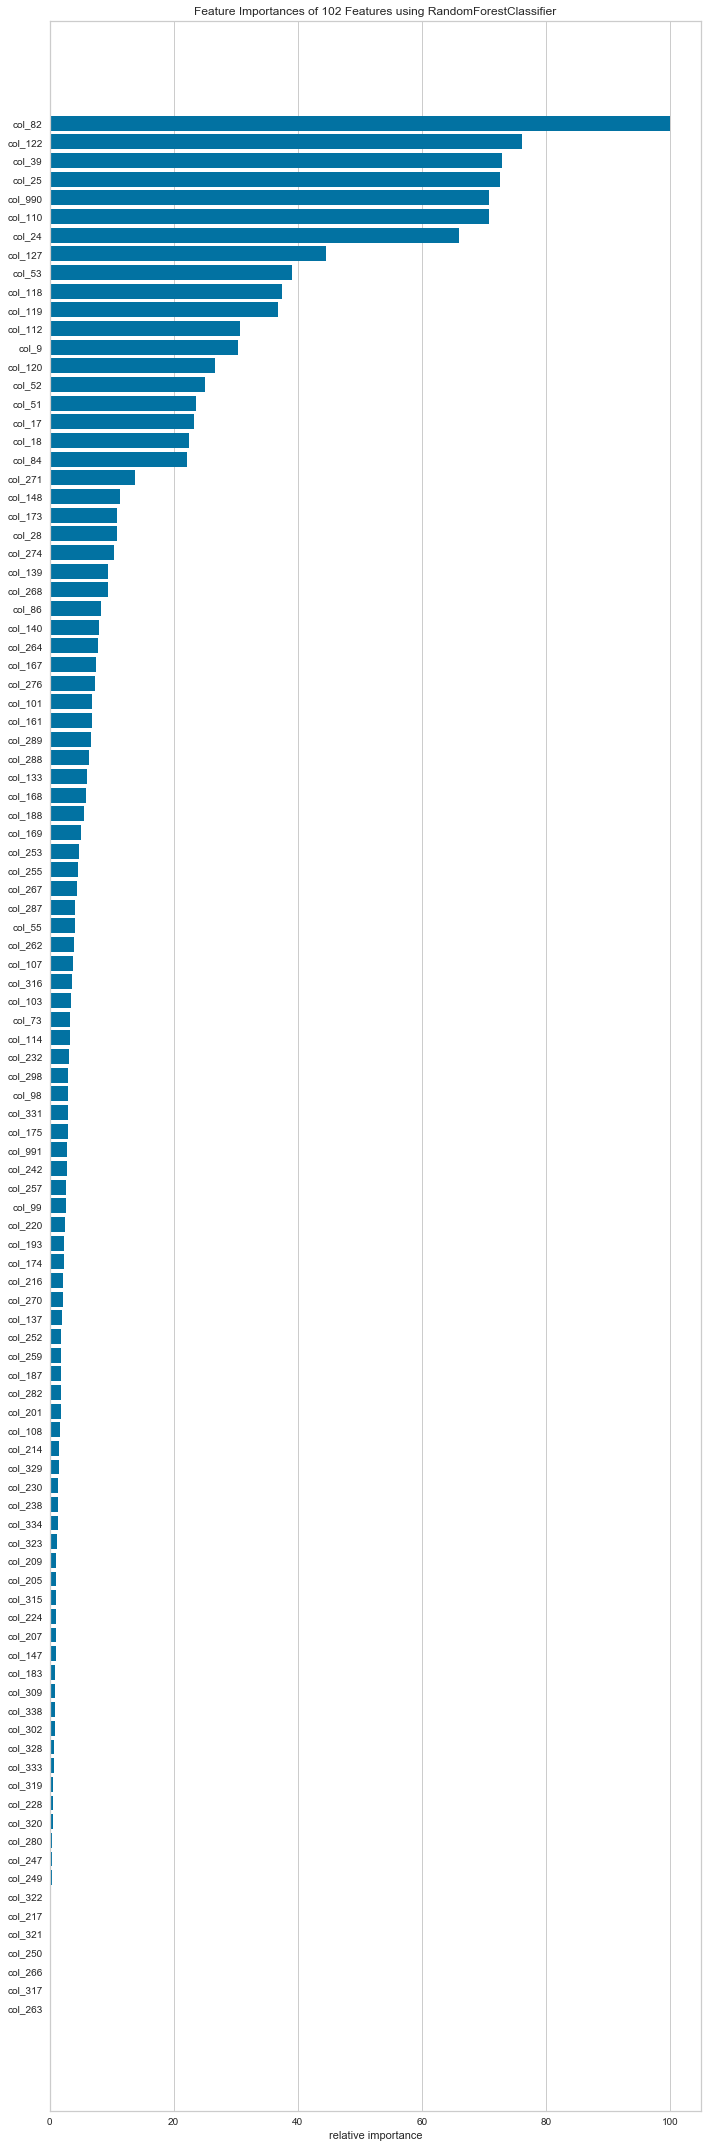

In [13]:
fig = plt.figure(figsize = (10,30))
ax = fig.add_subplot()

viz = FeatureImportances(clf, ax=ax)
viz.fit(x_train, y_train)
viz.poof()

In [14]:
np.sort(clf.feature_importances_)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.17546950e-05,
       1.74684625e-04, 2.23407097e-04, 2.50872522e-04, 2.80666186e-04,
       3.54218830e-04, 3.85469197e-04, 4.21751040e-04, 4.24276425e-04,
       5.06407069e-04, 5.52665437e-04, 6.29433688e-04, 6.84489868e-04,
       7.53741044e-04, 7.68119592e-04, 7.91587839e-04, 8.39488449e-04,
       8.56300455e-04, 8.84737491e-04, 8.98233099e-04, 9.35248687e-04,
       9.37689199e-04, 9.64389105e-04, 1.19504044e-03, 1.19541141e-03,
       1.20491817e-03, 1.31246295e-03, 1.34765567e-03, 1.46961915e-03,
       1.51532119e-03, 1.53107519e-03, 1.53490329e-03, 1.55191281e-03,
       1.61298861e-03, 1.73165609e-03, 1.86725054e-03, 1.89326703e-03,
       1.94390645e-03, 2.03355297e-03, 2.15387063e-03, 2.28990450e-03,
       2.30270412e-03, 2.34604860e-03, 2.43000190e-03, 2.48806436e-03,
       2.50402067e-03, 2.52449463e-03, 2.55486406e-03, 2.72750652e-03,
       2.77455538e-03, 2.85955312e-03, 2.97993821e-03, 3.09712503e-03,
      

### Based on the feature importances, I am taking the top 20 features by placing a threshold of 0.01

In [15]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clf, threshold=0.01)
sfm.fit(x_train, y_train)
x_train_imp = sfm.transform(x_train)
x_test_imp = sfm.transform(x_test)

### Defining a common function to calculate all relevant metrics for different models

In [16]:
def classifier_metrics(estimator,y_pred,y_score):
    class_metrics = {'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                     'Precision' : metrics.precision_score(y_test, y_pred),
                     'Recall' : metrics.recall_score(y_test, y_pred),
                     'F1 Score' : metrics.f1_score(y_test, y_pred),
                     'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
                    }


    df_metrics = pd.DataFrame.from_dict(class_metrics, orient='index')
    print('\nConfusion Matrix:')
    print(metrics.confusion_matrix(y_test,y_pred))
    
    print('\nClassification Report:')
    print(metrics.classification_report(y_test,y_pred,digits=2))
    
    print('\nMetrics:')
    print(df_metrics)
    
    return  df_metrics

In [27]:
def plot_roc(model,title,x_test,y_test):
    model_proba = model.predict_proba(x_test)
    fig = plt.figure()
    ax1 = fig.add_subplot()
    skplt.metrics.plot_roc(y_test,model_proba ,figsize = (15,7),title_fontsize='large',text_fontsize='large')                
    return None

### Logistic Regression Model - Used solver lbfgs as liblinear is more suited for smaller data sets.

In [17]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver = 'lbfgs', random_state = 100, n_jobs = -1, class_weight = {0:1,1:33})
param_grid_log = {'C':[5,8,10],
              'max_iter':[1000,1250,1500]}
grid_search_log= GridSearchCV(log,param_grid_log, cv=3, n_jobs=-1)
grid_search_log.fit(x_train_rfe, y_train)
print("Best estimator for big data: {}".format(grid_search_log.best_estimator_))

Best estimator for big data: LogisticRegression(C=10, class_weight={0: 1, 1: 33}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1250,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=100,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)


In [19]:
logreg = LogisticRegression(solver = 'lbfgs', random_state = 100, n_jobs = -1, C = 10, max_iter = 1250, class_weight = {0:1,1:33})
logreg.fit(x_train_rfe,y_train)
print("Training score :{:.3f}".format(logreg.score(x_train_rfe,y_train)))
print("Test score :{:.3f}".format(logreg.score(x_test_rfe,y_test)))

Training score :0.555
Test score :0.551


In [20]:
log_pred = logreg.predict(x_test_rfe)
log_proba =logreg.predict_proba(x_test_rfe)[:,1]

In [21]:
classifier_metrics(logreg,log_pred,log_proba)


Confusion Matrix:
[[2648 2194]
 [  53  105]]

Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.55      0.70      4842
          1       0.05      0.66      0.09       158

avg / total       0.95      0.55      0.68      5000


Metrics:
                  0
Accuracy   0.550600
Precision  0.045672
Recall     0.664557
F1 Score   0.085470
ROC AUC    0.665135


,0
Accuracy,0.550600
Precision,0.045672
Recall,0.664557
F1 Score,0.085470
ROC AUC,0.665135


<Figure size 576x396 with 0 Axes>

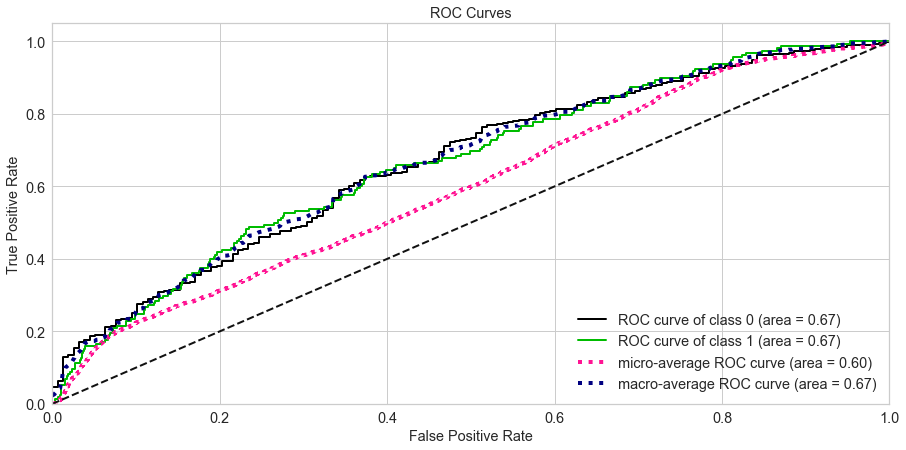

In [29]:
plot_roc(logreg, 'Logistic Regression',x_test_rfe, y_test)

In [31]:
param_grid_log1 = {'C':[5,8,10],
              'max_iter':[1000,1250,1500]} #Parameter values are changed multiple times based on trial and error

grid_search_log1= GridSearchCV(log,param_grid_log1, cv=3, n_jobs=-1)
grid_search_log1.fit(x_train_imp, y_train)
print("Best estimator for small data: {}".format(grid_search_log1.best_estimator_))

Best estimator for small data: LogisticRegression(C=5, class_weight={0: 1, 1: 33}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=100,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)


In [32]:
logreg1 = LogisticRegression(solver = 'lbfgs', random_state = 100, n_jobs = -1, C = 5, max_iter = 1000, class_weight = {0:1,1:33})
logreg1.fit(x_train_imp,y_train)
print("Training score :{:.3f}".format(logreg1.score(x_train_imp,y_train)))
print("Test score :{:.3f}".format(logreg1.score(x_test_imp,y_test)))

Training score :0.526
Test score :0.523


In [33]:
log_pred1 = logreg1.predict(x_test_imp)
log_proba1 =logreg1.predict_proba(x_test_imp)[:,1]
classifier_metrics(logreg1,log_pred1,log_proba1)


Confusion Matrix:
[[2505 2337]
 [  46  112]]

Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.52      0.68      4842
          1       0.05      0.71      0.09       158

avg / total       0.95      0.52      0.66      5000


Metrics:
                  0
Accuracy   0.523400
Precision  0.045733
Recall     0.708861
F1 Score   0.085923
ROC AUC    0.672462


,0
Accuracy,0.523400
Precision,0.045733
Recall,0.708861
F1 Score,0.085923
ROC AUC,0.672462


<Figure size 576x396 with 0 Axes>

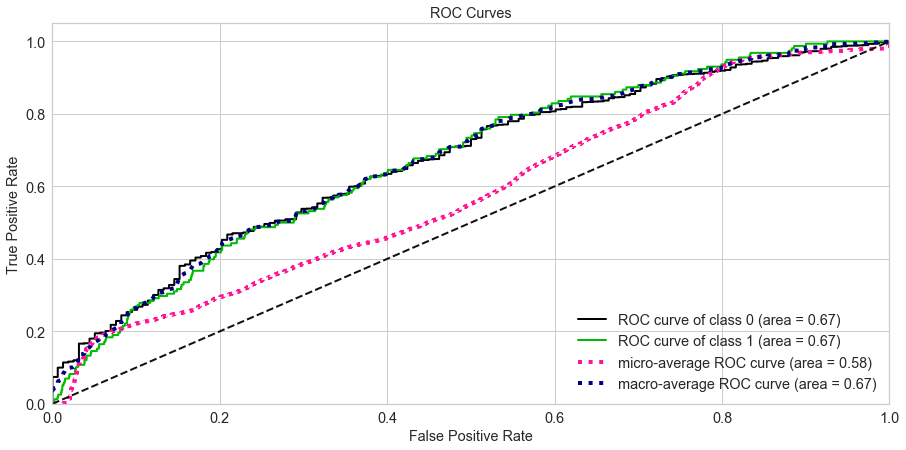

In [34]:
plot_roc(logreg1, 'Logistic Regression',x_test_imp, y_test)

### The model with 78 features has metrics almost similar to the dataset with 20 features. Infact, the recall value is slightly higher for the dataset with 20 features. This is becuase most of the features provide very little information

In [39]:
ranf = RandomForestClassifier(random_state = 100, n_jobs = -1, class_weight = {0:1,1:33}, bootstrap = True, oob_score = True )
random_grid = {'n_estimators': [100, 200, 500], 'max_features': [10,15,20], 'min_samples_leaf':[10,5,15]}
random_search = GridSearchCV(ranf, random_grid, cv=3, n_jobs=-1, verbose=2)
random_search.fit(x_train_rfe, y_train)

print("Best estimator for big data: {}".format(random_search.best_estimator_))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  8.8min finished


Best estimator for big data: RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 33},
            criterion='gini', max_depth=None, max_features=15,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=True, random_state=100,
            verbose=0, warm_start=False)


In [40]:
ranf_new = RandomForestClassifier(random_state = 100, n_jobs = -1, class_weight = {0:1,1:33}, bootstrap = True, oob_score = True,
                                 n_estimators = 500, min_samples_leaf = 5, max_features = 15)
ranf_new.fit(x_train_rfe, y_train)
print("Training score :{:.3f}".format(ranf_new.score(x_train_rfe,y_train)))
print("Test score :{:.3f}".format(ranf_new.score(x_test_rfe,y_test)))

Training score :0.999
Test score :0.967


In [42]:
random_grid = {'n_estimators': [50, 100, 200], 'max_features': [2,4,7], 'min_samples_leaf':[3,5,7]}
ranf1 = RandomForestClassifier(random_state = 100, n_jobs = -1, class_weight = {0:1,1:33}, bootstrap = True, oob_score = True)
random_search1 = GridSearchCV(ranf1,random_grid1,cv=3,n_jobs=-1,verbose=2)
random_search1.fit(x_train_imp, y_train)

print("Best estimator for small data: {}".format(random_search1.best_estimator_))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.1min finished


Best estimator for small data: RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 33},
            criterion='gini', max_depth=None, max_features=4,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=100,
            verbose=0, warm_start=False)


In [43]:
ranf1_new = RandomForestClassifier(random_state = 100, n_jobs = -1, class_weight = {0:1,1:33}, bootstrap = True, oob_score = True,
                                 n_estimators = 100, min_samples_leaf = 5, max_features = 4)
ranf1_new.fit(x_train_imp, y_train)
print("Training score :{:.3f}".format(ranf1_new.score(x_train_imp,y_train)))
print("Test score :{:.3f}".format(ranf1_new.score(x_test_imp,y_test)))

Training score :0.998
Test score :0.967


In [44]:
ranf_pred = ranf_new.predict(x_test_rfe)
ranf_proba =ranf_new.predict_proba(x_test_rfe)[:,1]
classifier_metrics(ranf_new,ranf_pred,ranf_proba)


Confusion Matrix:
[[4830   12]
 [ 155    3]]

Classification Report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4842
          1       0.20      0.02      0.03       158

avg / total       0.94      0.97      0.95      5000


Metrics:
                  0
Accuracy   0.966600
Precision  0.200000
Recall     0.018987
F1 Score   0.034682
ROC AUC    0.670595


,0
Accuracy,0.966600
Precision,0.200000
Recall,0.018987
F1 Score,0.034682
ROC AUC,0.670595


In [45]:
ranf_pred1 = ranf1_new.predict(x_test_imp)
ranf_proba1 =ranf1_new.predict_proba(x_test_imp)[:,1]
classifier_metrics(ranf1_new,ranf_pred1,ranf_proba1)


Confusion Matrix:
[[4832   10]
 [ 154    4]]

Classification Report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4842
          1       0.29      0.03      0.05       158

avg / total       0.95      0.97      0.95      5000


Metrics:
                  0
Accuracy   0.967200
Precision  0.285714
Recall     0.025316
F1 Score   0.046512
ROC AUC    0.638948


,0
Accuracy,0.967200
Precision,0.285714
Recall,0.025316
F1 Score,0.046512
ROC AUC,0.638948


### The random forest model does not provide good metrics as only the accuracy is high and completely overfits the training data. We can choose the logistic regression over random forest as it gives good recall values.

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
svc = SVC(class_weight = {0:1,1:33}, random_state = 100)
param_grid_svc = {'C':[0.001, 0.01, 0.1, 1, 10],
              'gamma' : [0.1, 1, 5, 10, 50, 100]}
random_search_svc= RandomizedSearchCV(svc,param_grid_svc, cv=3, verbose = 2, n_jobs = -1)
random_search_svc.fit(x_train_imp, y_train)

print("Best estimator : {}".format(random_search_svc.best_estimator_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

### Could not run SVC as my machine took too long to bring out the best parameters

### We can use different classification techniques(decision tree,KNN,etc) and compare the recall scores to figure out the best model. Hyperparameter tuning will greatly increase the performance of the model and repeated trial and error will yield the best model in terms of fit.
### The random forest algorithm has high training and test scores but can easily overfit any unseen data. Hence, we will take the logistic model with comparable train and test scores of around 0.5 as our final model and try to improve its performance.

### Model performnce can be improved by bagging and boosting methods. Here, we use gradient boosting classifier to improve model performance.

### First we will tune the estimators based on learning rate and then move to tree specific features

In [54]:
boost = GradientBoostingClassifier(random_state = 10, max_depth = 8, learning_rate = 0.1)
param_grid_boost = {'n_estimators':[20, 50, 75, 100]}
random_search_boost= GridSearchCV(boost,param_grid_boost, cv=3, n_jobs=-1, verbose = 2)
random_search_boost.fit(x_train_imp, y_train)

print("Best estimator : {}".format(random_search_boost.best_estimator_))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   41.1s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.5min finished


Best estimator : GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)


In [ ]:
### Min_samples_split is usually 0.5-1% of total observations 

In [56]:
boost1 = GradientBoostingClassifier(random_state = 10, max_depth = 8, learning_rate = 0.1, n_estimators = 50)
param_grid_boost1 = {'min_samples_split':[10,20,30], 'min_samples_leaf':[5,10,15]}
grid_search_boost= GridSearchCV(boost1,param_grid_boost1, cv=3, n_jobs=-1, verbose = 2)
grid_search_boost.fit(x_train_imp, y_train)

print("Best estimator : {}".format(grid_search_boost.best_estimator_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.2min finished


Best estimator : GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=10,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)


In [57]:
boosting = GradientBoostingClassifier(random_state = 10, max_depth = 8, learning_rate = 0.1, n_estimators = 50,
                                     min_samples_split = 10, min_samples_leaf = 10)
boosting.fit(x_train_imp,y_train)
print("Training score :{:.3f}".format(boosting.score(x_train_imp,y_train)))
print("Test score :{:.3f}".format(boosting.score(x_test_imp,y_test)))

Training score :0.971
Test score :0.968


In [58]:
boost_pred = boosting.predict(x_test_imp)
boost_proba =boosting.predict_proba(x_test_imp)[:,1]
classifier_metrics(boosting,boost_pred,boost_proba)


Confusion Matrix:
[[4840    2]
 [ 156    2]]

Classification Report:
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      4842
          1       0.50      0.01      0.02       158

avg / total       0.95      0.97      0.95      5000


Metrics:
                  0
Accuracy   0.968400
Precision  0.500000
Recall     0.012658
F1 Score   0.024691
ROC AUC    0.671944


,0
Accuracy,0.968400
Precision,0.500000
Recall,0.012658
F1 Score,0.024691
ROC AUC,0.671944


<Figure size 576x396 with 0 Axes>

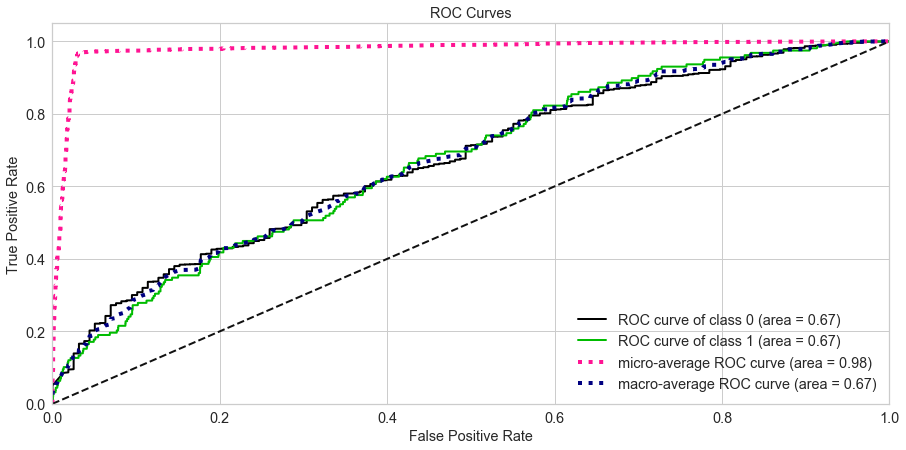

In [59]:
plot_roc(boosting, 'GBT',x_test_imp, y_test)

### We can see that the precision has increased to a great extent compared to logistic regression and random forest models.

### Dimensionality Reduction - A technique where all the features in the dataset can be explained by a few components(linear combinations of the features of the dataset)

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
x_train_red = pca.fit_transform(x_train)
x_test_red = pca.transform(x_test)
print(pca.n_components_)

1


In [68]:
pca = PCA(n_components = 0.99)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
print(pca.n_components_)

8


### 95% variance is explained by 1 component whereas 99% of the variance is explained by 8 components. We will use this data to see how the model performs

In [70]:
log_pca = LogisticRegression(solver = 'lbfgs', random_state = 100, n_jobs = -1, class_weight = {0:1,1:33})
pca_grid = {'C':[0.01, 0.1],
              'max_iter':[10,20,50]}
pca_log= GridSearchCV(log,pca_grid, cv=3, n_jobs=-1)
pca_log.fit(x_train_pca, y_train)
print("Best estimator for big data: {}".format(pca_log.best_estimator_))

Best estimator for big data: LogisticRegression(C=0.01, class_weight={0: 1, 1: 33}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=20,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=100,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)


In [71]:
log_pca1 = LogisticRegression(solver = 'lbfgs', random_state = 100, n_jobs = -1, class_weight = {0:1,1:33}, C = 0.01, max_iter = 20)
log_pca1.fit(x_train_pca, y_train)
print("Training score :{:.3f}".format(boosting.score(x_train_imp,y_train)))
print("Test score :{:.3f}".format(boosting.score(x_test_imp,y_test)))

Training score :0.971
Test score :0.968


### Notice that the training and test scores have increased from 0.5 in the logistic regression model.

In [72]:
logpca_pred = log_pca1.predict(x_test_pca)
logpca_proba =log_pca1.predict_proba(x_test_pca)[:,1]
classifier_metrics(log_pca1,logpca_pred,logpca_proba)


Confusion Matrix:
[[2211 2631]
 [  42  116]]

Classification Report:
             precision    recall  f1-score   support

          0       0.98      0.46      0.62      4842
          1       0.04      0.73      0.08       158

avg / total       0.95      0.47      0.61      5000


Metrics:
                  0
Accuracy   0.465400
Precision  0.042228
Recall     0.734177
F1 Score   0.079862
ROC AUC    0.644110


,0
Accuracy,0.465400
Precision,0.042228
Recall,0.734177
F1 Score,0.079862
ROC AUC,0.644110


### We will test the smote algorithm to tackle the issue of low precision/recall trade-off

In [100]:
# Requires installation of imbalanced learn in anaconda prompt - pip install -U imbalaned-learn
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 20)
x_train_res, y_train_res = smote.fit_sample(x_train_pca, y_train)
print("Resampled Dataset shape {}".format(Counter(y_res)))

Resampled Dataset shape Counter({1: 43505, 0: 43505})


In [101]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_train_pca,y_train,test_size = 0.1,random_state=12)

In [102]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)
clf_rf.score(x_test_smote, y_test_smote)

0.9995555555555555

In [103]:
metrics.recall_score(y_test_smote, clf_rf.predict(x_test_smote))

0.9935483870967742

In [104]:
clf_rf.score(x_test_pca, y_test)

0.8904

In [105]:
metrics.recall_score(y_test, clf_rf.predict(x_test_pca))

0.13291139240506328

In [106]:
metrics.precision_score(y_test, clf_rf.predict(x_test_pca))

0.04861111111111111

### The recall and precision scores of test data are very low

### Assumptions and Conclusions

### We have seen that very few methods give both high precision and recall scores which is the ideal situation. However, we can prioritize depending upon the application. Medical applications such as cancer prediction require high recall rates as positive instances should be identified whereas certain marketing offers or promotions require high precision. Further hyperparameter tuning and detailed analysis will lead to better results. In some cases using smote, only the classification rate/error would be an unbiased measure.
### Most of the columns in the data had values between 0 and 1 and hence I did not employ any kind of scaling procedure. Moreover, information about the columns would help in identifying/removing/modifying certain imporatant features in the dataset.
### 95% of the variance is explained by 1 component and the model performance will be impacted by such linear dependency between the features.
### Gradient Boosted Trees gave us the best recall score and hence would be the preferred model among logistic and random forest.
